# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load

In [2]:
Spotify_data = pd.read_csv(r"C:\Users\meers\Downloads\Spotify Data\spotify_history.csv")

In [3]:
Spotify_data

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


# Check Structure

In [4]:
Spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [5]:
Spotify_data.describe()

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [6]:
Spotify_data.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


# Cleaning Data

Handle missing values.

Convert timestamps to datetime.

Create new time-based features (year, month, day, hour).

Convert ms_played to minutes/seconds.

Remove extremely short plays less than 15 seconds to filter out accidental clicks.

In [7]:
#Convert timestep to Datetime

Spotify_data['ts'] = pd.to_datetime(Spotify_data['ts'])

Spotify_data['ts_year'] = Spotify_data['ts'].dt.year
Spotify_data['ts_month'] = Spotify_data['ts'].dt.month_name()
Spotify_data['ts_day'] = Spotify_data['ts'].dt.day
Spotify_data['ts_hour'] = Spotify_data['ts'].dt.hour



In [8]:
# Filter, convert to seconds, and format in one go
Spotify_data = (
    Spotify_data.assign(duration_seconds=Spotify_data['ms_played'] / 1000)
                .loc[lambda df: df['duration_seconds'] >= 15]
                .assign(minute_and_seconds=lambda df: df['duration_seconds'].apply(
                    lambda x: f"{int(x // 60)}:{int(x % 60):02d}"
                ))
)


Spotify_data

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,ts_year,ts_month,ts_day,ts_hour,duration_seconds,minute_and_seconds
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013,July,8,2,61.865,1:01
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013,July,8,2,285.386,4:45
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013,July,8,2,134.022,2:14
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False,2013,July,8,3,63.485,1:03
10,07hII2Rc29q4F2nTE3P1od,2013-07-08 03:20:20,web player,67587,Sun - Gildas Kitsunй Club Night Short Remix,Two Door Cinema Club,The Kitsuné Special Edition #3 (Kitsuné Maison...,clickrow,clickrow,False,False,2013,July,8,3,67.587,1:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149835,6xphDvC3ctr99cgNFKErB4,2024-12-15 22:55:13,android,219600,Our Last Days,The Fray,Helios,trackdone,trackdone,True,False,2024,December,15,22,219.600,3:39
149836,0nH5hlHtKfkCnF0cXIGBik,2024-12-15 22:57:00,android,105659,Sad Song - Acoustic,Liam Gallagher,Acoustic Sessions,trackdone,fwdbtn,True,True,2024,December,15,22,105.659,1:45
149841,3IYAT3Rtlyqlo4ndbugxfl,2024-12-15 23:00:10,android,185373,17,Kings of Leon,Only By The Night,fwdbtn,trackdone,True,False,2024,December,15,23,185.373,3:05
149842,3F34I6GIzPjDUMSHVpo7RP,2024-12-15 23:05:19,android,280293,Get Out While You Can,James Bay,Chaos And The Calm,trackdone,trackdone,True,False,2024,December,15,23,280.293,4:40


In [9]:
#Removing uncessary columns

Spotify_data = Spotify_data.drop(columns=['ts', 'ms_played'])


In [10]:
Spotify_data

,spotify_track_uri,platform,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,ts_year,ts_month,ts_day,ts_hour,duration_seconds,minute_and_seconds
1,1oHxIPqJyvAYHy0PVrDU98,web player,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013,July,8,2,61.865,1:01
2,487OPlneJNni3NWC8SYqhW,web player,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013,July,8,2,285.386,4:45
3,5IyblF777jLZj1vGHG2UD3,web player,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013,July,8,2,134.022,2:14
5,50VNvhzyaSplJCKWchN7a8,web player,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False,2013,July,8,3,63.485,1:03
10,07hII2Rc29q4F2nTE3P1od,web player,Sun - Gildas Kitsunй Club Night Short Remix,Two Door Cinema Club,The Kitsuné Special Edition #3 (Kitsuné Maison...,clickrow,clickrow,False,False,2013,July,8,3,67.587,1:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149835,6xphDvC3ctr99cgNFKErB4,android,Our Last Days,The Fray,Helios,trackdone,trackdone,True,False,2024,December,15,22,219.600,3:39
149836,0nH5hlHtKfkCnF0cXIGBik,android,Sad Song - Acoustic,Liam Gallagher,Acoustic Sessions,trackdone,fwdbtn,True,True,2024,December,15,22,105.659,1:45
149841,3IYAT3Rtlyqlo4ndbugxfl,android,17,Kings of Leon,Only By The Night,fwdbtn,trackdone,True,False,2024,December,15,23,185.373,3:05
149842,3F34I6GIzPjDUMSHVpo7RP,android,Get Out While You Can,James Bay,Chaos And The Calm,trackdone,trackdone,True,False,2024,December,15,23,280.293,4:40


# Exploratory Data Analysis

Questions to answer:

1. Top artists & tracks by total minutes played.

2. Listening habits by hour.

3. Platform usage (web player, mobile, etc.).

4. Skips behavior – which songs or artists are skipped most.

5. Album listening trends.


In [11]:
# Top artists & tracks by total minutes played.

top_artists = Spotify_data.groupby('artist_name')['duration_seconds'].sum().sort_values(ascending=False).head(10)
top_artists

#Based on the results shown below, we can conclude that the user's most-listened-to artist is The Beatles, as they have the highest total listening time in seconds.

artist_name
The Beatles           1196263.938
The Killers           1054641.170
John Mayer             721410.787
Bob Dylan              565501.928
Paul McCartney         355079.224
Howard Shore           348064.068
The Strokes            316351.837
The Rolling Stones     305651.413
Pink Floyd             258405.475
Led Zeppelin           245032.347
Name: duration_seconds, dtype: float64

In [12]:
# Listening habits by hour.

hourly_listening = Spotify_data.groupby('ts_hour')['duration_seconds'].sum()
hourly_listening

# Based on the results below, we can conclude that the user listens to most of their music between 6:00 PM and 7:00 PM.

ts_hour
0     1302227.684
1     1144142.790
2     1032928.945
3      986314.824
4      836883.778
5      816043.530
6      798426.841
7      505775.994
8      299956.364
9      207081.612
10     148476.282
11     105617.120
12     104804.350
13     226814.042
14     406701.236
15     561303.415
16     979516.243
17    1376012.303
18    1378579.463
19    1262946.539
20    1290889.071
21    1095177.155
22    1002066.875
23    1227987.118
Name: duration_seconds, dtype: float64

In [13]:
# Platform usage (web player, mobile, etc.).

Platform_usage =  Spotify_data.groupby('platform')['platform'].count()

Platform_usage

# Based on the information, the user's preferred platform for listening to music is Android.

platform
android           89908
cast to device     3475
iOS                2503
mac                1133
web player          160
windows            1277
Name: platform, dtype: int64

In [14]:
# Skips behavior – which songs or artists are skipped most.

skips = Spotify_data[Spotify_data['skipped'] == True].groupby('artist_name').size().sort_values(ascending=False).head(10)
skips
# We can conclude that The Beatles had the highest number of skips, with a total of 70.

artist_name
The Beatles               70
Bob Dylan                 51
The Killers               43
Led Zeppelin              37
The Rolling Stones        35
Juanes                    34
Radiohead                 34
Kanye West                31
David Bisbal              30
The Velvet Underground    28
dtype: int64

In [15]:
#Album listening trends.

Top_albums = Spotify_data.groupby('album_name')['duration_seconds'].sum().sort_values(ascending=False).head(10)
Top_albums
 
# The user's most-listened-to album is The New Abnormal, as it has the highest total listening time as shown below.

album_name
The New Abnormal                                      186466.181
The Beatles                                           184272.176
Imploding The Mirage                                  159633.258
Abbey Road                                            147643.028
Blood On The Tracks                                   147313.295
Hot Fuss                                              143725.045
Past Masters                                          143103.471
The Wall                                              140148.556
Pressure Machine                                      113105.540
Where the Light Is: John Mayer Live In Los Angeles    112890.020
Name: duration_seconds, dtype: float64

# Data Visualization in Python

1. Bar chart: Top 10 Artists.

2. Heatmap: Listening by day of week & hour.

3. Pie chart: Platform usage.

4. Bar Chart: Top ten most skip songs

5. Line Graph: Album listening trends

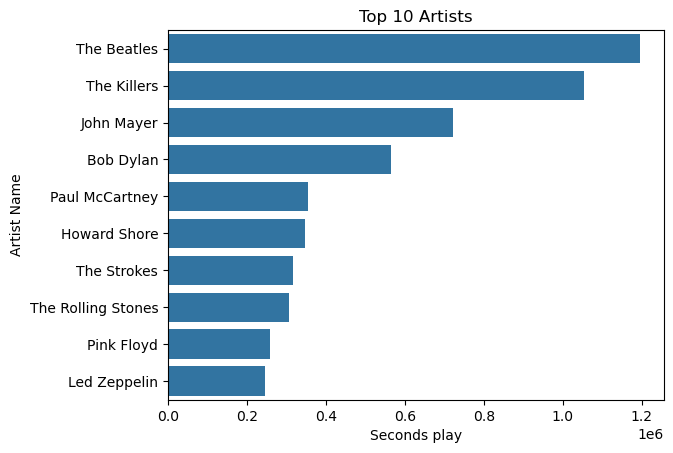

In [16]:
# Bar chart: Top 10 Artists.
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists')
plt.xlabel('Seconds play')
plt.ylabel('Artist Name')
plt.savefig('Top_Artists.png')

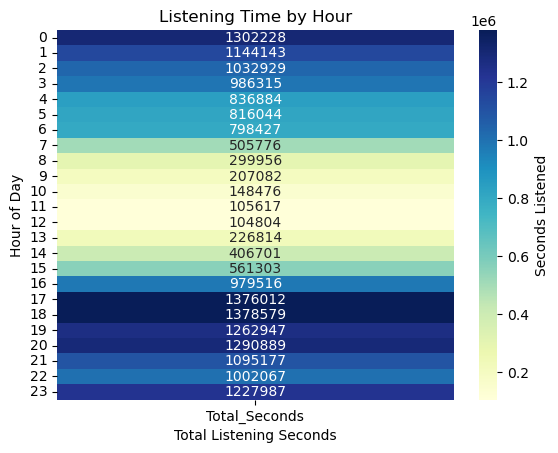

In [17]:
# Heatmap: Listening by day of week & hour.
# Step 1: Convert Series to DataFrame
hourly_df = hourly_listening.reset_index()
hourly_df.columns = ['Hour', 'Total_Seconds']

# Step 2: Set Hour as index (hours will be rows)
heatmap_data = hourly_df.set_index('Hour')

# Step 3: Plot vertical heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Seconds Listened'})
plt.title("Listening Time by Hour")
plt.ylabel("Hour of Day")
plt.xlabel("Total Listening Seconds")
plt.savefig("Listening_Time_by_Hour_Heatmap.png")


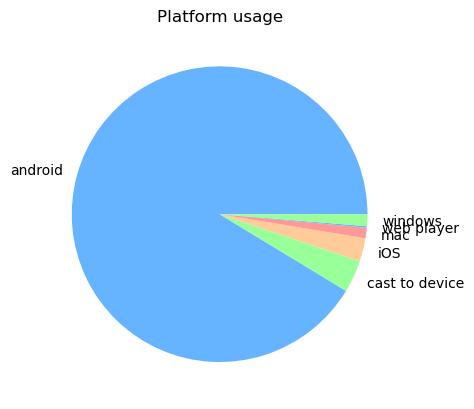

In [18]:
# Pie chart: Platform usage.
plt.pie(
    Platform_usage,                 # data values
    labels=Platform_usage.index,    # platform names
    colors=['#66b3ff','#99ff99','#ffcc99','#ff9999']
)
plt.title('Platform usage')
plt.savefig('Platform_Usage.png')


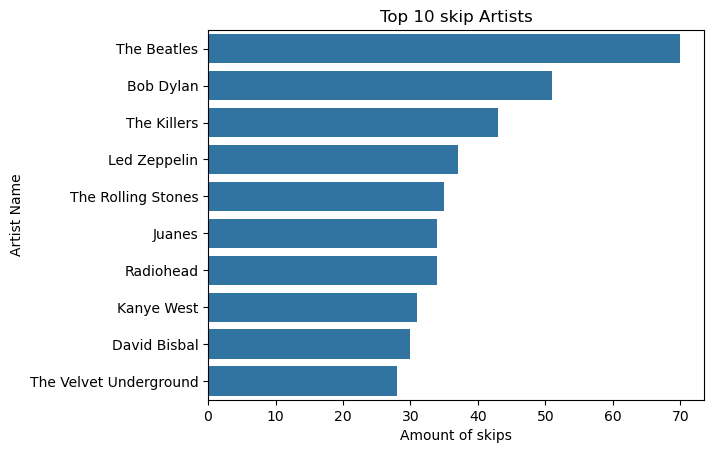

In [19]:
# Bar Chart: Top ten most skip songs
sns.barplot(x=skips.values, y=skips.index)
plt.title('Top 10 skip Artists')
plt.xlabel('Amount of skips')
plt.ylabel('Artist Name')
plt.savefig('Most_skip_artist.png')


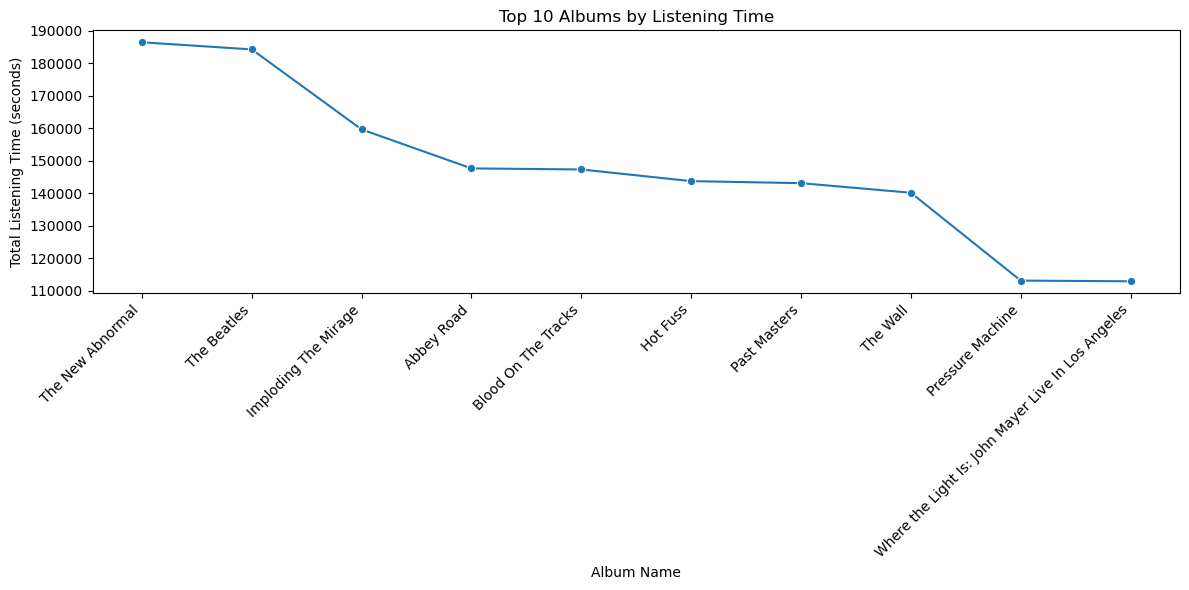

In [20]:
# Line Graph: Album listening trends
Albums_df = Top_albums.reset_index()
plt.figure(figsize=(12,6))  # make the plot wider
sns.lineplot(data=Albums_df, x="album_name", y="duration_seconds", marker='o')
plt.xticks(rotation=45, ha='right')  # rotate labels and align them
plt.xlabel('Album Name')
plt.ylabel('Total Listening Time (seconds)')
plt.title('Top 10 Albums by Listening Time')
plt.tight_layout()  # adjust layout so nothing gets cut off
plt.savefig('Top_10_Albums_by_listening_time.png')

#Create a Spotify_data csv file

In [21]:
Spotify_data.to_csv('clean_data.csv', index=False)
